In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from datetime import date, datetime

In [2]:
#Preview file
csv_path = "uber-rides-dataset.csv"

# Create dataframe
uber_df = pd.read_csv(csv_path)
uber_df.head()

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,...,9.29,2015-05-11T17:26:00,12,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,...,9.93,2015-05-11T18:46:00,10,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,...,18.01,2015-05-13T09:15:00,14,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none
3,"May 16, 2015 at 1:44AM",Completed,Uber,49613a86a04e6c15d72b51d1a2935d81,d3f73f8151c2e8c34b541f961db7f5fa,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,...,5.10,2015-05-16T00:24:00,3,3,0.84,0.87,0.56,partly-cloudy-night,Partly Cloudy,none
4,"May 16, 2015 at 3:18AM",Completed,Uber,9896148fdecdb4c5d977a8691510bdb6,1287d21e6455ee40d4861f6b91c680f4,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,...,21.92,2015-05-16T01:29:00,3,1,0.90,1.61,0.31,partly-cloudy-night,Partly Cloudy,none


In [3]:
# Preview the columns with the data we can exploit
uber_df.columns

Index(['trip_completed_at', 'trip_status', 'ride_hailing_app', 'trip_uid',
       'driver_uid', 'rider_uid', 'customer', 'trip_start_time',
       'trip_end_time', 'trip_time', 'total_time', 'wait_time', 'trip_type',
       'surge_multiplier', 'vehicle_make_model', 'vehicle_license_plate',
       'driver_name_en', 'vehicle_make', 'vehicle_model', 'driver_gender',
       'driver_photo_url', 'driver_phone_number', 'pickup_lat', 'pickup_long',
       'dropoff_lat', 'dropoff_long', 'trip_map_image_url',
       'trip_path_image_url', 'city', 'country', 'trip_start_address',
       'trip_end_address', 'rub_usd_exchange_rate', 'price_rub', 'price_usd',
       'distance_kms', 'temperature_time', 'temperature_value', 'feels_like',
       'humidity', 'wind_speed', 'cloudness', 'weather_main', 'weather_desc',
       'precipitation'],
      dtype='object')

# DRIVER GENDER 'driver_gender'

In [4]:
# Calculate the number of male and female drivers
gender_count = uber_df["driver_gender"].value_counts()

# Calculate the percentage of male and female drivers
percent_count = round((gender_count)/len(uber_df['driver_gender'])*100,2)

# Create a summary table for genders
gender_table = pd.DataFrame({"Gender Count": gender_count, "Gender Percentage":percent_count})
gender_table

,Gender Count,Gender Percentage
Male,659,97.2
Female,19,2.8


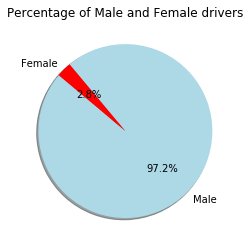

In [5]:
# Create a pie chart for genders
labels = 'Male', 'Female'
sizes = percent_count
colors = ["lightblue", "red"]

plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Male and Female drivers")

#plt.savefig("../Images/percent_gender_pie_chart.png")
plt.show()

# DRIVER FIRST NAME 'driver_name_en'

In [6]:
# Find drivers first name
drivers_names = pd.DataFrame(uber_df['driver_name_en'])

# Show duplicates first names
drivers_names = drivers_names.groupby(drivers_names.columns.tolist()).size()
names_df = pd.DataFrame(drivers_names).reset_index()

first_name = names_df['driver_name_en']
name_count = names_df[0]

# Show table with all the first names
names_table = pd.DataFrame({"First Name": first_name, "Name Count": name_count})
names_table.head()

,First Name,Name Count
0,Abbos,1
1,Abdula,1
2,Abdullo,1
3,Abuzar,1
4,Ahmad,1


In [7]:
# Create a table with the 15 most popular first names among Uber drivers 
top_names = names_table.nlargest(15,['Name Count']) 
top_names.head()

,First Name,Name Count
10,Aleksandr,54
143,Sergey,40
11,Aleksey,38
18,Andrey,37
51,Dmitriy,29


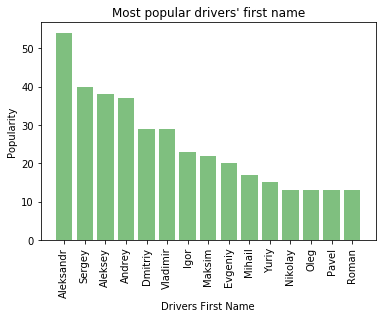

In [8]:
# Create a bar chart with the 15 most popular drivers first name
first_names1 = top_names['First Name']
total_names1 = np.arange(len(first_names1))
popularity1 = top_names['Name Count']

plt.bar(total_names1, popularity1, align='center', alpha=0.5, color='green')
plt.xticks(total_names1, first_names1)
plt.ylabel('Popularity')
plt.xlabel('Drivers First Name')
plt.title("Most popular drivers' first name")
plt.xticks(rotation='vertical')

plt.show()
#plt.savefig("../Images/popular_names_bar_chart.png")

# WAIT TIME 'wait_time'

In [9]:
# Show wait time and convert to time format 
wait_df = uber_df['wait_time']
wait_df = pd.to_datetime(uber_df['wait_time'])
pd.DataFrame(wait_df).head()

,wait_time
0,2019-10-02 00:07:27
1,2019-10-02 00:06:33
2,2019-10-02 00:16:07
3,2019-10-02 00:06:23
4,2019-10-02 00:10:06


In [10]:
# Find all the trips dates 
start_df = uber_df['trip_start_time']
start_df = pd.to_datetime(start_df).reset_index()
start_df

trip_number = start_df['index']
trip_date = start_df['trip_start_time']

# Show table with all the trips and dates
trip_dates_df = pd.DataFrame({"Trip Number": trip_number, "Trip Date": trip_date})
trip_dates_df.head()

,Trip Number,Trip Date
0,0,2015-05-11 17:26:00
1,1,2015-05-11 18:46:00
2,2,2015-05-13 09:15:00
3,3,2015-05-16 00:24:00
4,4,2015-05-16 01:29:00


In [11]:
# Show the year and month for each trip 
trip_dates_df['Year'] = trip_dates_df['Trip Date'].apply(lambda line:  str(line.year))
trip_dates_df['Month'] = trip_dates_df['Trip Date'].apply(lambda line:  str(line.month))

new_trip_table = pd.DataFrame({"Trip Number": trip_number, 
                               "Trip Date": trip_date, 
                               "Month": (trip_dates_df['Month']), 
                               "Year": (trip_dates_df['Year']), 
                               "Wait Time by Minutes": (wait_df.dt.minute)})

new_trip_table.head()


,Trip Number,Trip Date,Month,Year,Wait Time by Minutes
0,0,2015-05-11 17:26:00,5,2015,7
1,1,2015-05-11 18:46:00,5,2015,6
2,2,2015-05-13 09:15:00,5,2015,16
3,3,2015-05-16 00:24:00,5,2015,6
4,4,2015-05-16 01:29:00,5,2015,10


In [12]:
# Find the average wait time per month
wait_df_mean = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].mean()
pd.DataFrame(wait_df_mean).head()

Wait Time by Minutes
Year Month                      
2015 10                 7.750000
     11                12.600000
     12                11.142857
     5                  9.333333
     6                 11.714286

In [13]:
# Find the maximum wait time per month
wait_df_by_max = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].max()
pd.DataFrame(wait_df_by_max).head()

Wait Time by Minutes
Year Month                      
2015 10                       17
     11                       17
     12                       21
     5                        17
     6                        45

In [14]:
# Find the minimum wait time per month
wait_df_by_min = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].min()
pd.DataFrame(wait_df_by_min).head()

Wait Time by Minutes
Year Month                      
2015 10                        4
     11                        6
     12                        6
     5                         3
     6                         1

In [15]:
all_wait_df = pd.DataFrame({"Maximum Wait": (wait_df_by_max), 
                          "Average Wait": (wait_df_mean), 
                            "Minimum Wait": (wait_df_by_min)})
pd.DataFrame(all_wait_df).head()

Maximum Wait  Average Wait  Minimum Wait
Year Month                                          
2015 10               17      7.750000             4
     11               17     12.600000             6
     12               21     11.142857             6
     5                17      9.333333             3
     6                45     11.714286             1

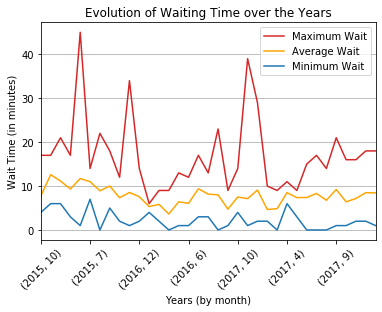

In [21]:
# Create a line graph showing the average, minimum and maximum wait time for each month
all_wait_df.plot(style='-', color =('tab:red', 'orange', 'tab:blue'))

plt.xlabel("Years (by month)")
plt.ylabel("Wait Time (in minutes)")
plt.legend(loc="best")
plt.title("Evolution of Waiting Time over the Years")
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.show()
#plt.savefig("../Images/wait_time_line_chart.png")

In [25]:
#Find the first trip date
first_trip = trip_dates_df['Trip Date'][trip_dates_df.index[0]]

# Find the last trip date
last_trip = trip_dates_df['Trip Date'][trip_dates_df.index[-1]]

print ("The first trip recorded was on:", first_trip, "and the last trip was on:", last_trip)

The first trip recorded was on: 2015-05-11 17:26:00 and the last trip was on: 2018-04-27 14:15:00


In [32]:
# Find percentage of wait time in total trip time 

ride_duration = uber_df['trip_time']
ride_duration = pd.to_datetime(ride_duration)

wait_duration = uber_df['wait_time']
wait_duration = pd.to_datetime(wait_duration)



percent_wait_of_total = (((wait_duration.dt.minute)*100) / ride_duration.dt.minute)
percent_wait_of_total

0        33.333333
1        31.578947
2       266.666667
3        46.153846
4        26.315789
5       106.250000
6         7.500000
7        39.024390
8        40.000000
9        28.000000
10       47.058824
11       85.714286
12       80.000000
13       26.000000
14      200.000000
15      106.250000
16      118.181818
17       81.250000
18       62.500000
19       14.285714
20       66.666667
21     4500.000000
22       17.777778
23       30.000000
24       16.000000
25       20.000000
26      100.000000
27       27.272727
28       26.666667
29      237.500000
          ...     
648      66.666667
649      94.736842
650      41.176471
651      21.052632
652      52.173913
653      28.571429
654     100.000000
655      21.428571
656      37.500000
657      50.000000
658      52.380952
659      40.000000
660      11.111111
661      50.000000
662       4.761905
663      20.000000
664      41.176471
665      13.043478
666      45.161290
667      55.000000
668      38.461538
669      38.

In [ ]:
#### 4) START TIME 'trip_start_time' not sure #####

In [ ]:
percent_wait = 

In [ ]:
# Find time of the day the trip started 'trip_start_time'
start_time = uber_df['trip_start_time']


start_time_lst = list(start_time)
start_time_lst

# Find average time of the day 'trip_start_time'
#avg_start = start_time_lst.mean()
#avg_start

# Find correlation between time of the day and gender 'trip_start_time'

In [ ]:
# Find number of cancelled trips 'trip_status' 
status_trip = uber_df['trip_status']
status_trip


status_trip_df = pd.DataFrame(status_trip).reset_index()
status_trip_df

#df = pd.DataFrame({"Years": years, "Wait time": wait_df })
#df = pd.to_datetime(df)

cancel = status_trip_df.groupby('Cancelled')#.count()
cancel
#cancel_trip = status_trip == 'Cancelled'
#nb_cancel_trip = cancel_trip.count()

#status_trip = pd.DataFrame({'Cancelled':list('status_trip')})
#status_trip.groupby('Cancelled').count()
#uber_df['trip_status'].groupby('Cancelled').count()

# Find number of completed rides 'trip_status' 
#completed_trip = status_trip == 'Completed'
#completed_trip.count()

# Find correlation between ride status and time of the day 'trip_status' 

In [24]:
# Find ride durations (only riding) 'trip_time'




#avg_duration = ride_duration.mean()
#avg_duration

# Find average ride durations ''trip_time'

#print ("The average duration time of a trip is:", avg_duration)


0     2019-10-02 00:21:33
1     2019-10-02 00:19:27
2     2019-10-02 01:06:53
3     2019-10-02 00:13:37
4     2019-10-02 00:38:54
5     2019-10-02 00:16:38
6     2019-10-02 00:40:24
7     2019-10-02 00:41:56
8     2019-10-02 00:10:06
9     2019-10-02 00:25:30
10    2019-10-02 00:17:47
11    2019-10-02 00:14:28
12    2019-10-02 00:15:19
13    2019-10-02 00:50:13
14    2019-10-02 00:12:39
15    2019-10-02 00:16:18
16    2019-10-02 00:11:27
17    2019-10-02 00:16:39
18    2019-10-02 00:16:28
19    2019-10-02 00:14:13
20    2019-10-02 00:21:12
21    2019-10-02 00:01:00
22    2019-10-02 00:45:40
23    2019-10-02 00:30:44
24    2019-10-02 00:25:18
25    2019-10-02 00:30:18
26    2019-10-02 00:09:33
27    2019-10-02 00:22:31
28    2019-10-02 00:45:00
29    2019-10-02 01:08:04
              ...        
648   2019-10-02 00:21:35
649   2019-10-02 00:19:54
650   2019-10-02 00:17:57
651   2019-10-02 00:19:12
652   2019-10-02 00:23:49
653   2019-10-02 00:14:42
654   2019-10-02 00:13:13
655   2019-1

In [ ]:
# Find the percentage of wait in each trip total duration 'wait_time' 'total_time'

# Find the average percentage of wait time in total duration 'wait_time' 'total_time'

# Find correlation between wait time percentage and gender ''wait_time' total_time'

In [ ]:
# Find how often a trip was booked during surge hours

# Find correlation between time of the day the trip started and surge mulitplier 'trip_start_time' 'surge_multiplier'

In [ ]:
#correlation between total trip time and waiting time 

In [ ]:
# Calculate the sum of all the waiting times over the years 
sum_wait = wait_df.sum()

print ("The sum of all the waiting times over the years is:", sum_wait)

In [ ]:
# Calculate average wait time
avg_wait = wait_df.mean()
avg_wait = avg_wait
      
print ("The average waiting time is:", avg_wait)
